In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
vasili_stats = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

vasili_table = pd.read_csv(vasili_stats, sep="\t")
sub_vasili = vasili_table.loc[(vasili_table.finalQC != "fail")
                              & (vasili_table.cov_chrA >= 20)
                              & (vasili_table.remove_as_relative != True)
                              & (vasili_table.remove_manual != True)
                              & (~vasili_table.ID.str.startswith("SAMEA11633"))
                             ]

In [3]:
female_IDs = sub_vasili.loc[sub_vasili.gSEX == "F"].ID

In [4]:
len(sub_vasili.species_genotyping.unique())#.loc[sub_vasili.gSEX == "F"]

251

In [5]:
# Picking a macaque
for df_path in glob.glob('../results/window_stats_20x_inds/Macaca_nemestrina*_10kb_het_hom.txt'):
    print(df_path)
    output_df = pd.read_csv(df_path, sep="\t")
    print(output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Macaca_nemestrina_ssp_10kb_het_hom.txt
['SAMN07503410' 'SAMN07508148' 'SAMN07508151' 'SAMN07508154'
 'SAMN02922335' 'SAMN02922336' 'SAMN02922338' 'SAMN02922339'
 'SAMN02922340' 'SAMN03121842' 'SAMN10499710' 'SAMN10499711'
 'SAMN10499712' 'SAMN10499713' 'SAMN10499714' 'SAMN10499715'
 'SAMN10499716' 'SAMN10499717' 'SAMN10499718' 'SAMN10499719'
 'SAMN10499720' 'SAMN10499721' 'SAMN18570964']


In [6]:
glob.glob("../results/window_stats_20x_inds/Mac*_10kb_het_hom.txt")

['../results/window_stats_20x_inds/Macaca_maura_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_thibetana_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_nigrescens_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_mulatta_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_leucogenys_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_fascicularis_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_brunnescens_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_tonkeana_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_nemestrina_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_radiata_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_arctoides_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_cyclopis_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x_inds/Macaca_fuscata_ssp_10kb_het_hom.txt',
 '../results/window_stats_20x

In [7]:
output_df.loc[output_df.GVCF_ID.isin(female_IDs)].groupby(["GVCF_ID", "chr_type"])[["het"]].mean()

het
GVCF_ID      chr_type           
SAMN02922335 aut       27.256143
             chrX      15.289953
SAMN02922336 aut       28.938635
             chrX      15.553490
SAMN02922338 aut       26.846739
             chrX      15.604257
SAMN02922339 aut       27.670766
             chrX      15.957121
SAMN02922340 aut       27.628531
             chrX      16.027856
SAMN03121842 aut        0.000984
             chrX       0.000250
SAMN07508148 aut       27.726660
             chrX      14.929890
SAMN07508151 aut       27.010260
             chrX      15.796056
SAMN10499711 aut       29.163420
             chrX      16.923505
SAMN10499712 aut       29.173153
             chrX      17.084069
SAMN10499714 aut       28.789359
             chrX      17.079687
SAMN10499715 aut       29.151916
             chrX      17.056839
SAMN10499716 aut       29.179757
             chrX      17.215587
SAMN10499717 aut       28.519522
             chrX      16.426228
SAMN10499718 aut       28.033680
             chrX      15.510110
SAMN10499719 aut       28.271372
             chrX      15.787480
SAMN10499720 aut       28.327006
             chrX      15.967387

In [8]:
output_df.loc[output_df.chr_type == "chrX"]

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
1662578,0.0,0,0,SAMN07503410,0,NC_092145.1,10000,0.0000,chrX,Macaca_nemestrina_ssp
1662579,10.0,0,142,SAMN07503410,10000,NC_092145.1,20000,0.1236,chrX,Macaca_nemestrina_ssp
1662580,12.0,0,220,SAMN07503410,20000,NC_092145.1,30000,0.2357,chrX,Macaca_nemestrina_ssp
1662581,6.0,0,153,SAMN07503410,30000,NC_092145.1,40000,0.3050,chrX,Macaca_nemestrina_ssp
1662582,0.0,0,28,SAMN07503410,40000,NC_092145.1,50000,0.3583,chrX,Macaca_nemestrina_ssp
...,...,...,...,...,...,...,...,...,...,...
2029998,13.0,0,113,SAMN18570964,159700000,NC_092145.1,159710000,0.1931,chrX,Macaca_nemestrina_ssp
2029999,19.0,0,106,SAMN18570964,159710000,NC_092145.1,159720000,0.2196,chrX,Macaca_nemestrina_ssp
2030000,0.0,0,44,SAMN18570964,159720000,NC_092145.1,159730000,0.0838,chrX,Macaca_nemestrina_ssp
2030001,6.0,0,61,SAMN18570964,159730000,NC_092145.1,159740000,0.0967,chrX,Macaca_nemestrina_ssp


[(0.0, 1.0),
 Text(0.5, 1.0, 'Nemestrina callablility per 10kb'),
 Text(0.5, 0, 'Callability')]

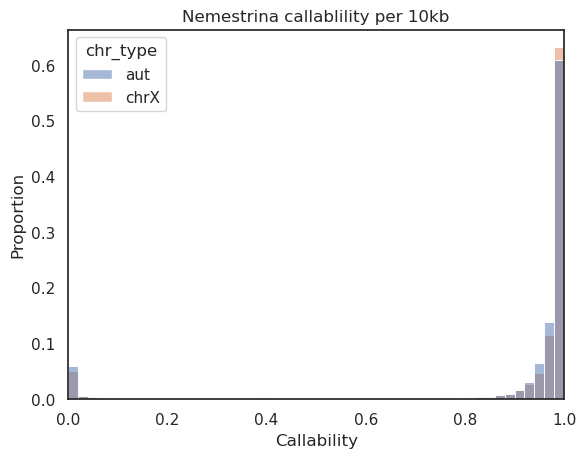

In [9]:
g = sns.histplot(output_df.loc[(output_df.het < 100)],
                 x="callable_frac", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(0, 1), title="Nemestrina callablility per 10kb", xlabel="Callability")

[(-1.0, 100.0),
 Text(0.5, 1.0, 'Raw heterozygosity per 10kb'),
 Text(0.5, 0, 'Heterozygosity')]

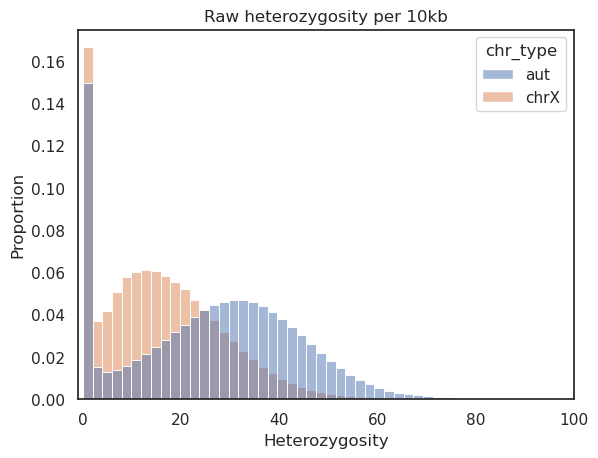

In [10]:
g = sns.histplot(output_df.loc[(output_df.het < 100)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(-1, 100), title="Raw heterozygosity per 10kb", xlabel="Heterozygosity")

In [11]:
output_df.loc[(output_df.chr_type == "chrX") & (output_df.callable_frac >= 0.75) & (output_df.window_start <= 10000000)].groupby(["window_start"])["het"].mean().reset_index(),

(     window_start        het
 0           60000   9.956522
 1           70000   7.391304
 2           80000   9.695652
 3           90000   4.826087
 4          100000  12.260870
 ..            ...        ...
 875       9960000  24.565217
 876       9970000  20.478261
 877       9980000  21.304348
 878       9990000  19.826087
 879      10000000  22.173913
 
 [880 rows x 2 columns],)

<Axes: xlabel='window_start', ylabel='het'>

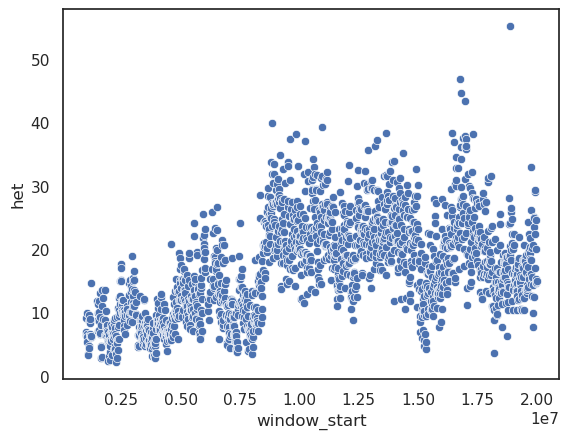

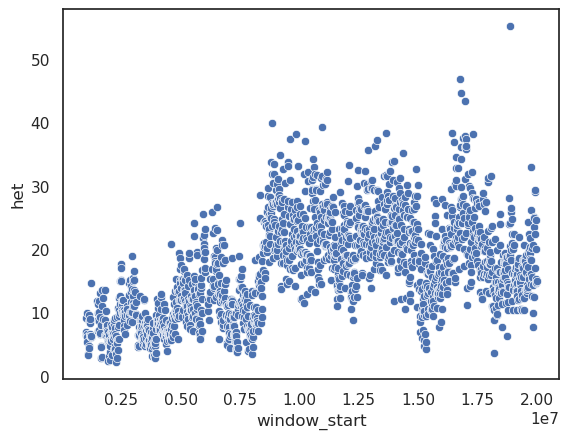

In [ ]:
sns.scatterplot(output_df.loc[(output_df.chr_type == "chrX") & (output_df.callable_frac >= 0.75)
                              & (output_df.window_start <= 20000000)
                             & (output_df.window_start >= 1000000)].groupby(["window_start"])["het"].mean().reset_index(),
                x="window_start", y="het"
        )

In [13]:
output_df.loc[(output_df.chr_type == "chrX") & (output_df.callable_frac >= 0.75)
                              & (output_df.window_start <= 20000000)
                             & (output_df.window_start >= 1000000)].groupby(["window_start"])["het"].mean().reset_index()

,window_start,het
0,1000000,6.434783
1,1010000,6.913043
2,1020000,9.086957
3,1040000,9.869565
4,1050000,6.695652
...,...,...
1770,19960000,14.652174
1771,19970000,15.304348
1772,19980000,24.695652
1773,19990000,14.913043


[(-1.0, 100.0),
 Text(0.5, 1.0, 'Filtered heterozygosity per 10kb'),
 Text(0.5, 0, 'Heterozygosity')]

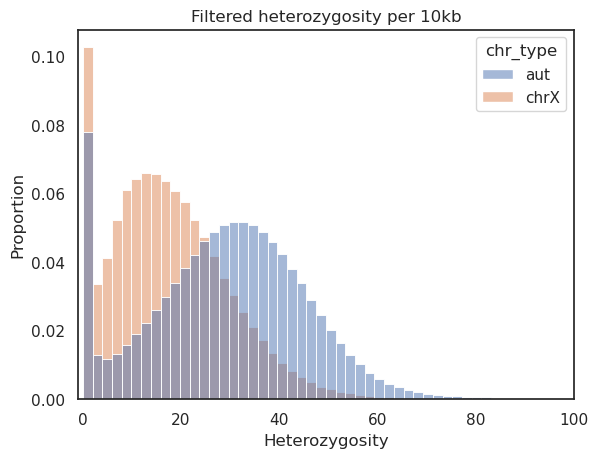

In [14]:
g = sns.histplot(output_df.loc[(output_df.het < 100) & (output_df.callable_frac > 0.75)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(-1, 100), title="Filtered heterozygosity per 10kb", xlabel="Heterozygosity")

In [15]:
# Picking a orang
for df_path in glob.glob('../results/window_stats_20x_inds/Pongo_pygmaeus_*_10kb_het_hom.txt'):
    print(df_path)
    pongo_df = pd.read_csv(df_path, sep="\t")
    print(output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Pongo_pygmaeus_ssp_10kb_het_hom.txt
['SAMN07503410' 'SAMN07508148' 'SAMN07508151' 'SAMN07508154'
 'SAMN02922335' 'SAMN02922336' 'SAMN02922338' 'SAMN02922339'
 'SAMN02922340' 'SAMN03121842' 'SAMN10499710' 'SAMN10499711'
 'SAMN10499712' 'SAMN10499713' 'SAMN10499714' 'SAMN10499715'
 'SAMN10499716' 'SAMN10499717' 'SAMN10499718' 'SAMN10499719'
 'SAMN10499720' 'SAMN10499721' 'SAMN18570964']


In [16]:
pongo_df = pongo_df.loc[pongo_df.GVCF_ID.isin(female_IDs)]
pongo_df.groupby(["GVCF_ID", "chr_type"])[["het"]].mean()

het
GVCF_ID        chr_type           
PD_0262        aut       14.680554
               chrX       4.685636
SAMEA104361533 aut       14.348093
               chrX       5.120216
SAMEA104361535 aut       14.704941
               chrX       3.796533
SAMEA104361537 aut       14.668991
               chrX       5.194769
SAMEA104361540 aut       13.517573
               chrX       3.875186
SAMEA104361541 aut       15.275941
               chrX       5.028206
SAMN01920547   aut       14.395586
               chrX       5.790755
SAMN01920548   aut       15.375434
               chrX       5.701168
SAMN01920549   aut       13.824779
               chrX       4.853131
SAMN01920550   aut       14.968874
               chrX       4.980181

[(0.0, 1.0), Text(0.5, 1.0, 'Callablility per 10kb')]

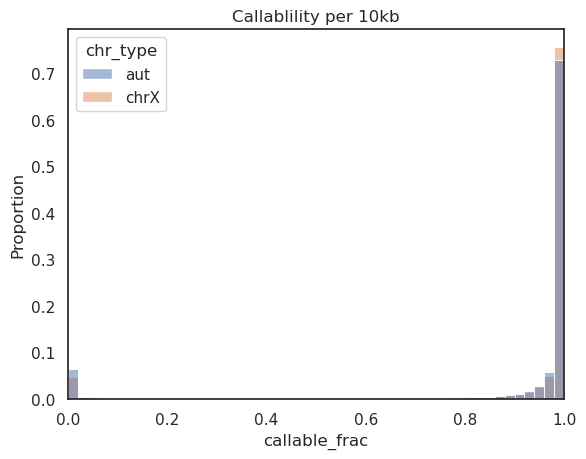

In [17]:
g = sns.histplot(pongo_df.loc[(pongo_df.het < 100)],
                 x="callable_frac", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(0, 1), title="Callablility per 10kb")

[(-1.0, 100.0), Text(0.5, 1.0, 'Raw heterozygosity per 10kb')]

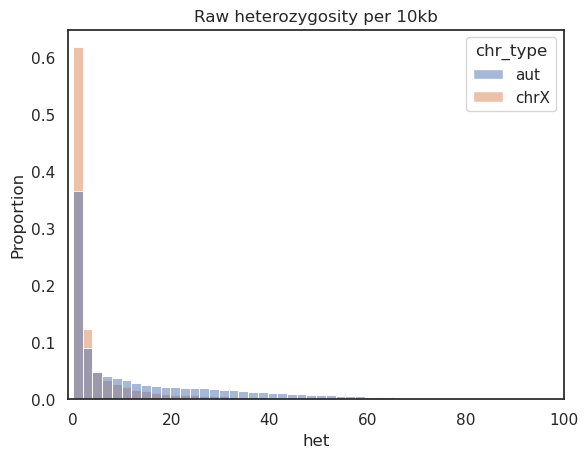

In [18]:
g = sns.histplot(pongo_df.loc[(pongo_df.het < 100)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(-1, 100), title="Raw heterozygosity per 10kb")

In [51]:
# Picking a Alouatta
for df_path in glob.glob('../results/window_stats_20x_inds/Alouatta_palliata*_10kb_het_hom.txt'):
    print(df_path)
    aloutta_df = pd.read_csv(df_path, sep="\t")
    print(output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Alouatta_palliata_ssp_10kb_het_hom.txt
['SAMN07503410' 'SAMN07508148' 'SAMN07508151' 'SAMN07508154'
 'SAMN02922335' 'SAMN02922336' 'SAMN02922338' 'SAMN02922339'
 'SAMN02922340' 'SAMN03121842' 'SAMN10499710' 'SAMN10499711'
 'SAMN10499712' 'SAMN10499713' 'SAMN10499714' 'SAMN10499715'
 'SAMN10499716' 'SAMN10499717' 'SAMN10499718' 'SAMN10499719'
 'SAMN10499720' 'SAMN10499721' 'SAMN18570964']


In [52]:
aloutta_df = aloutta_df.loc[aloutta_df.GVCF_ID.isin(female_IDs)]
aloutta_df.groupby(["GVCF_ID", "chr_type"])[["het"]].mean()

het
GVCF_ID chr_type          
PD_0175 aut       3.834859
        chrX      2.280815

[(0.0, 1.0),
 Text(0.5, 1.0, 'Callablility per 10kb'),
 Text(0.5, 0, 'Callability')]

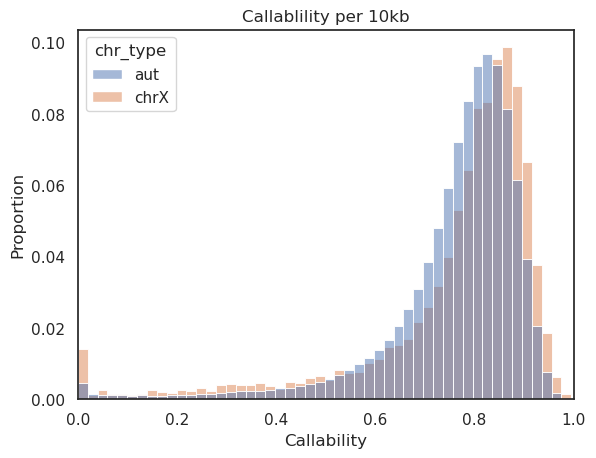

In [53]:
g = sns.histplot(aloutta_df.loc[(aloutta_df.het < 100)],
                 x="callable_frac", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(0, 1), title="Callablility per 10kb", xlabel="Callability")

[(-1.0, 20.0),
 Text(0.5, 1.0, 'Raw heterozygosity per 10kb'),
 Text(0.5, 0, 'Heterozygosity')]

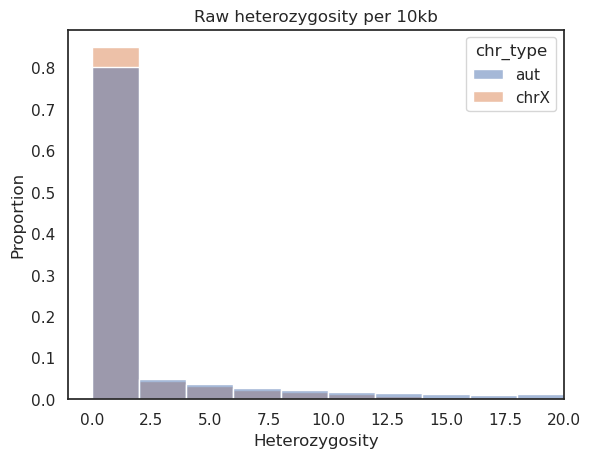

In [56]:
g = sns.histplot(aloutta_df.loc[(aloutta_df.het <= 20)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=10)
g.set(xlim=(-1, 20), title="Raw heterozygosity per 10kb", xlabel="Heterozygosity")

[(-1.0, 20.0),
 Text(0.5, 1.0, 'Filtered heterozygosity per 10kb'),
 Text(0.5, 0, 'Heterozygosity')]

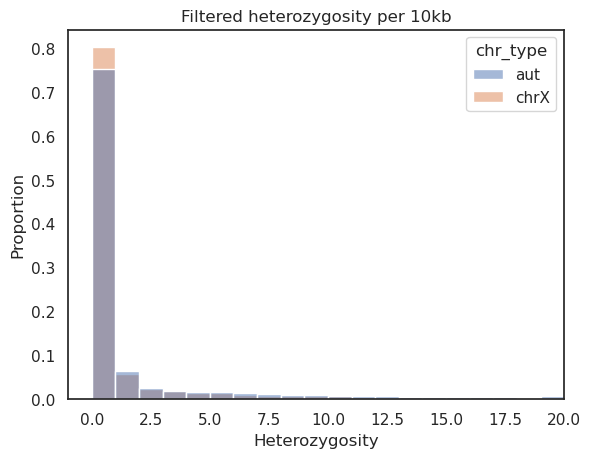

In [58]:
g = sns.histplot(aloutta_df.loc[(aloutta_df.het <= 20) & (aloutta_df.callable_frac > 0.75)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=20)
g.set(xlim=(-1, 20), title="Filtered heterozygosity per 10kb", xlabel="Heterozygosity")

In [61]:
aloutta_df.loc[(aloutta_df.callable_frac > 0.75)].groupby(["GVCF_ID", "chr_type"])[["het"]].mean()

het
GVCF_ID chr_type          
PD_0175 aut       2.573571
        chrX      1.484880

In [45]:
# Picking a high aut low x
for df_path in glob.glob('../results/window_stats_20x_inds/Cheirogaleus_sibreei_ssp*_10kb_het_hom.txt'):
    print(df_path)
    mandril_df = pd.read_csv(df_path, sep="\t")
    print(output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Cheirogaleus_sibreei_ssp_10kb_het_hom.txt
['SAMN07503410' 'SAMN07508148' 'SAMN07508151' 'SAMN07508154'
 'SAMN02922335' 'SAMN02922336' 'SAMN02922338' 'SAMN02922339'
 'SAMN02922340' 'SAMN03121842' 'SAMN10499710' 'SAMN10499711'
 'SAMN10499712' 'SAMN10499713' 'SAMN10499714' 'SAMN10499715'
 'SAMN10499716' 'SAMN10499717' 'SAMN10499718' 'SAMN10499719'
 'SAMN10499720' 'SAMN10499721' 'SAMN18570964']


In [46]:
mandril_df = mandril_df.loc[mandril_df.GVCF_ID.isin(female_IDs)]
mandril_df.groupby(["GVCF_ID", "chr_type"])[["het"]].mean()

het
GVCF_ID      chr_type           
SAMN11334320 aut       32.863802
             chrX      10.690789

[(-1.0, 100.0),
 Text(0.5, 1.0, 'Filtered heterozygosity per 10kb, dwarf lemur'),
 Text(0.5, 0, 'Heterozygosity')]

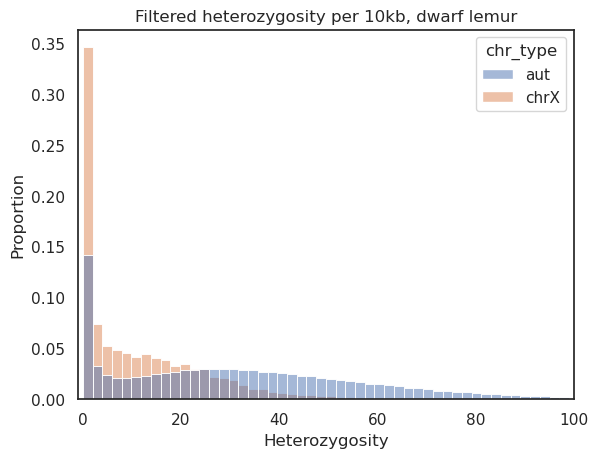

In [47]:
g = sns.histplot(mandril_df.loc[(mandril_df.het < 100) & (mandril_df.callable_frac > 0.75)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(-1, 100), title="Filtered heterozygosity per 10kb, dwarf lemur", xlabel="Heterozygosity")

In [48]:
# Picking a high aut high x
for df_path in glob.glob('../results/window_stats_20x_inds/Pongo_abelii_ssp*_10kb_het_hom.txt'):
    print(df_path)
    mandril_df = pd.read_csv(df_path, sep="\t")
    print(output_df.GVCF_ID.unique())

../results/window_stats_20x_inds/Pongo_abelii_ssp_10kb_het_hom.txt
['SAMN07503410' 'SAMN07508148' 'SAMN07508151' 'SAMN07508154'
 'SAMN02922335' 'SAMN02922336' 'SAMN02922338' 'SAMN02922339'
 'SAMN02922340' 'SAMN03121842' 'SAMN10499710' 'SAMN10499711'
 'SAMN10499712' 'SAMN10499713' 'SAMN10499714' 'SAMN10499715'
 'SAMN10499716' 'SAMN10499717' 'SAMN10499718' 'SAMN10499719'
 'SAMN10499720' 'SAMN10499721' 'SAMN18570964']


In [49]:
mandril_df = mandril_df.loc[mandril_df.GVCF_ID.isin(female_IDs)]
mandril_df.groupby(["GVCF_ID", "chr_type"])[["het"]].mean()

het
GVCF_ID        chr_type           
PD_0263        aut       23.212723
               chrX      16.575471
SAMEA104361529 aut       19.389748
               chrX      13.416779
SAMEA104361530 aut       20.979791
               chrX      14.970292
SAMEA104361532 aut       18.173636
               chrX      12.365666
SAMEA2058382   aut       21.718511
               chrX      14.205683
SAMEA5204232   aut       15.412847
               chrX       8.633350
SAMN01920542   aut       22.107896
               chrX      14.186677
SAMN01920543   aut       21.769733
               chrX      14.722106
SAMN01920544   aut       21.379311
               chrX      14.834051
SAMN01920545   aut       21.657269
               chrX      14.321565
SAMN06275555   aut       21.979718
               chrX      13.701255

[(-1.0, 100.0),
 Text(0.5, 1.0, 'Filtered heterozygosity per 10kb, sumatran orang'),
 Text(0.5, 0, 'Heterozygosity')]

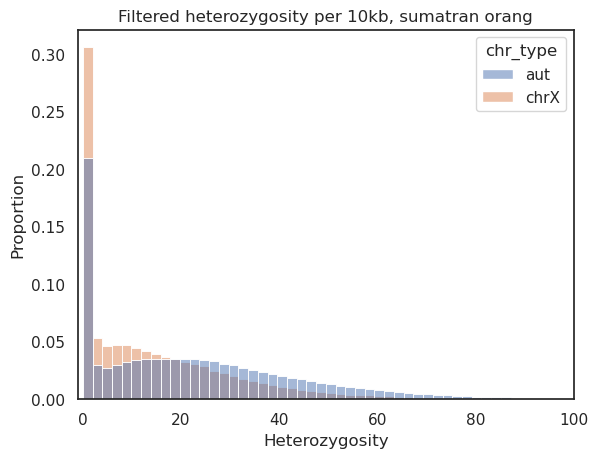

In [50]:
g = sns.histplot(mandril_df.loc[(mandril_df.het < 100) & (mandril_df.callable_frac > 0.75)],
                 x="het", hue="chr_type", stat="proportion", common_norm=False, bins=50)
g.set(xlim=(-1, 100), title="Filtered heterozygosity per 10kb, sumatran orang", xlabel="Heterozygosity")